# 🏨 **Hotel Cancel Culture: Who Will Cancel?** 🏨

**Who?**
>* 🏢 **Revenue Management (RM) teams** for hotel groups (corporate, franchise)
>
>
>* 🏨 On-site GMs, Sales, and Ops teams

**Why?**
>* 💰 **Revenue Management:** 
>  * Revenue optimization: Right price, right time, right customer
>    * Dynamic pricing
>    * Distribution channels
>    * Pricing per room type
>
>
>* 🤝 **Sales:**
>  * Group sales (pickup/wash)
>  * BT (performance/company for both GPP and LNR rates)
>
>
>* 🛌 **Rooms Ops:**
>  * Forecasting occupancy, arrivals, departures, stay-overs, same-day booking demand, and probability of guest relocation in the case of oversell.
>  * Determining staff schedules and periods of high demand
>
>
>* 🍰 ☕ **Food and Beverage:**
>  * Ordering food/supplies overall
>  * Scheduling staff
>  * Determining busy times (breakfast, lunch, dinner)
>    * Staffing, specific food/supplies

**What?**
>* 🧾 Dataset comprised of... 
>  * 32 different features
>    * Detailed explanation of features (and sub-categories, when appropriate) available in Readme
>  * Nearly 120,000 reservation records
>  * Source cited in Readme

❌ **How?**
>* Which models/methods? 
>* Data prep and feature engineering

**Goal:** determine whether or not a reservation would cancel given different details of a guest and their reservation.

# 📌 **To-Do**

>* Update each section with ***working*** code
>* Include references/details for relevant packages
---

- [ ] [TD1](#td1)
- [ ] [TD2](#td2)
- [ ] [TD3](#td3)
- [ ] [todo4](#td4)
- [ ] [todo5](#td5)
- [ ] [todo6](#td6)
- [ ] [todo7](#td7)

# 📂 **Imports**

In [1]:
## Data Handling
import pandas as pd
import numpy as np
from scipy import stats

## Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


## Modeling - SKLearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor

# from sklearn.naive_bayes import MultinomialNB # for naive bayes model

## Settings
from ipywidgets import interact
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)
from sklearn import set_config
set_config(display='diagram')

In [2]:
## Personal functions
import clf_functions.functions as cf
%load_ext autoreload
%autoreload 1
%aimport clf_functions.functions

# 📖 **Read Data**

In [3]:
## Reading data and saving to a DataFrame

source = 'http://data.insideairbnb.com/united-states/dc/washington-dc/2021-07-10/data/listings.csv.gz'

data = pd.read_csv(source)

In [4]:
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

In [5]:
data.shape

(8033, 74)

> The initial reading of the dataset shows there are 74 features and 8,033 entries. A quick glance at the `.head()` gives a sample of the entries, showing that some of the features are not relevant to my analysis.
>
> I will drop the following features now as they are metadata related to the webscraping required to provide the data (and would not have any meaningful impact on my analysis):
>
>* listing_url
>
>
>* scrape_id
>
>
>* last_scraped
>
>
>* picture_url
>
>
>* host_url
>
>
>* host_thumbnail_url
>
>
>* host_picture_url
>
>
>* calendar_last_scraped

In [6]:
## Dropping irrelevant columns
df = data.drop(columns= ['listing_url', 'scrape_id', 'last_scraped', 'picture_url',
                         'host_url', 'host_thumbnail_url','host_picture_url',
                         'calendar_last_scraped']).copy()

In [7]:
cf.report_df(df)

,datatypes,num_unique,null_sum,null_pct,count,mean,std,min,25%,50%,75%,max
id,int64,8033,0,0.00,"8,033.00","29,229,605.94","14,924,204.65","3,686.00","16,559,042.00","28,584,343.00","43,848,758.00","50,949,841.00"
name,object,7579,1,0.00,nan,nan,nan,nan,nan,nan,nan,nan
description,object,7122,158,0.02,nan,nan,nan,nan,nan,nan,nan,nan
neighborhood_overview,object,4260,2889,0.36,nan,nan,nan,nan,nan,nan,nan,nan
host_id,int64,4791,0,0.00,"8,033.00","96,996,662.06","112,161,778.57","4,492.00","14,449,082.00","47,900,667.00","138,404,250.00","411,330,714.00"
host_name,object,2476,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_since,object,2415,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_location,object,375,150,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_about,object,2736,3161,0.39,nan,nan,nan,nan,nan,nan,nan,nan
host_response_time,object,4,2642,0.33,nan,nan,nan,nan,nan,nan,nan,nan


In [8]:
## Creating features/target for dataset
target = 'review_scores_rating'

X = df.drop(columns = target).copy()
y = df[target].copy()

In [9]:
## Confirming same number of rows
X.shape[0] == y.shape[0]

True

In [10]:
## Splitting to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 🧼 **Starting Cleaning and EDA**

In [11]:
## Checking for class imbalances in target variable
y_train.describe()

count   4,406.00
mean        4.69
std         0.69
min         0.00
25%         4.68
50%         4.86
75%         5.00
max         5.00
Name: review_scores_rating, dtype: float64

In [12]:
## Checking value counts (binned to see the ranges of values)
y_train.value_counts(dropna=False,sort=False, bins=10, normalize=True)

(-0.006, 0.5]   0.01
(0.5, 1.0]      0.00
(1.0, 1.5]      0.00
(1.5, 2.0]      0.00
(2.0, 2.5]      0.00
(2.5, 3.0]      0.01
(3.0, 3.5]      0.00
(3.5, 4.0]      0.02
(4.0, 4.5]      0.06
(4.5, 5.0]      0.62
Name: review_scores_rating, dtype: float64

In [13]:
## Checking minimum value due to bins showing a negative value
y_train.min()

0.0

---

> The target feature, `'review_scores_rating'`, is currently a range of values from 0 to 5, with 69% of the scores being 4 or above. The `.value_counts()` results show a value sub-zero; this is for the purpose of binning the values; the lowest value is actually 0.00.
>
>
>In order to use these values, I would need to bin them into categories based on ranges of values for analysis.

---

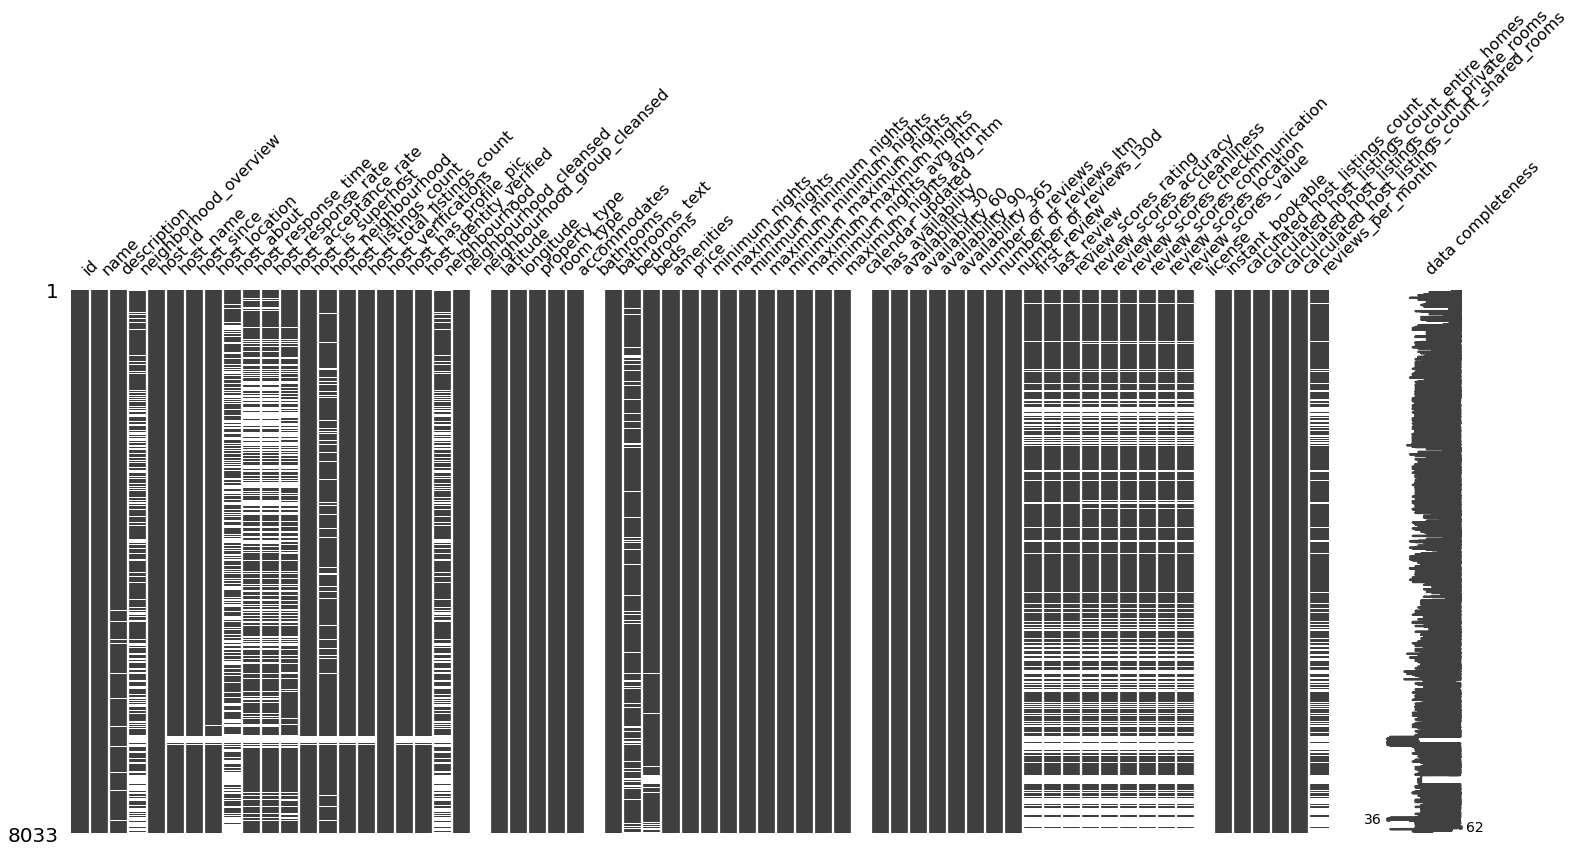

In [14]:
## Visually inspecting missing values
import missingno as missno

missno.matrix(df, labels=True);

>---
>
> The visualization above shows the missing values in each column as a blank space.
>
>
> Based on this visualization, I see that there is a consistent trend in missing values for review scores: if a row is missing one review score, it seems to be missing all of them.
>
>
> After reviewing these details, I feel more comfortable with the option of dropping those rows with missing values. I will consider dropping the values as part of my overall classification process.
>
>---

In [26]:
# report = cf.report_df(X_train)
# report

In [25]:
# report.style.bar(subset=['null_pct'], color='#d65f5f')#, vmin=0, vmax=1)

In [24]:
# @interact
# def sort_report(column=['num_unique', 'null_pct'], ascending = False, color='#d65f5f'):
#     display(report.sort_values(column, ascending=ascending).style.bar(subset=[column], color=color))

In [22]:
# cf.report_df(df)

In [27]:
columns = list(cf.report_df(df).columns)
columns

['datatypes',
 'num_unique',
 'null_sum',
 'null_pct',
 'count',
 'mean',
 'std',
 'min',
 '25%',
 '50%',
 '75%',
 'max']

In [51]:
sort_cols = list(cf.report_df(df).columns)
sort_cols

['datatypes',
 'num_unique',
 'null_sum',
 'null_pct',
 'count',
 'mean',
 'std',
 'min',
 '25%',
 '50%',
 '75%',
 'max']

In [54]:
interact(cf.sort_report, Sort_by=sort_cols, Source=source);

interactive(children=(Text(value='http://data.insideairbnb.com/united-states/dc/washington-dc/2021-07-10/data/…

In [ ]:
import fsds as fs

In [ ]:
fs.ihelp_menu([fs.ihelp_menu, sort_report])

In [ ]:
sort_report('null_sum', ascending=True)

## ❓ **Null Values and How to Address:**

>* **Children:** fill in missing values with zero (75% of the data is zero, making it an easy and accurate choice)
>
>
>* **Country, Agent:** For these three sections, the documentation for the dataset indicates that "NULL" or NaN values are not truly *missing* from the dataset, but that the data source did not have any values for those reservations.
>  * **To address:** I will impute the string, "missing," as a placeholder to keep these features in the dataset.
>
>
>* **Company:** Since this feature is 94% empty values, it would have an insignificant impact on the predictions of whether or not a guest will cancel their reservation.
>  * **To address:** I will drop the column as part of the 

In [ ]:
## Unsure what this code was for - something about the "Undefined" values? 

# for col in X_train.columns:
#     if X_train[col].dtype == 'O':
#         print(X_train[col].value_counts(),'\n\n')

In [ ]:
# for col in X_train.columns:
#     if 'Undefined' in X_train[col]:
#         print(col)

In [ ]:
# 'undefined' in X_train["meal"]

In [ ]:
# X_train['distribution_channel'].unique()

In [ ]:
# #3 Identifying which columns indicate missing values based on .isna() method

# nan_cols = []

# for column in X_train.columns:
#     if X_train[column].isna().sum() > 0:
#         nan_cols.append(column)
#         print(column,'\n\n',X_train[column].value_counts(dropna=False),'\n\n')
        
# nan_cols

In [ ]:
# for column in X_train.columns:
#     if X_train[column].isna().sum() > 0:
# #         nan_cols.append(column)
#         print(column,'\n\n',X_train[column].isna().sum(),'\n\n')

In [ ]:
# X_train['country'].isna().sum()

In [ ]:
# X_train[X_train['country'].isna()]

# 🚿 **Preprocessing Pipeline**

In [ ]:
# cat_cols = ['hotel', 'meal','arrival_date_month', 'country', 'market_segment',
#             'distribution_channel','is_repeated_guest','reserved_room_type',
#             'assigned_room_type','deposit_type', 'agent',
#             'customer_type','reservation_status']

# cont_cols = [col for col in X_train.drop(['reservation_status_date','company'],axis=1).columns if col not in cat_cols]

# cont_cols

In [ ]:
# X_train[cat_cols] = X_train[cat_cols].astype(str)

In [ ]:
# X_test[cat_cols] = X_test[cat_cols].astype(str)

In [ ]:
# ## Creating ColumnTransformer and sub-transformers for imputation and encoding

# # Filling missing "Children"
# zero_transformer = SimpleImputer(strategy='constant', fill_value=0)

# ##  
# missing_transformer = SimpleImputer(strategy='constant', fill_value='missing')

# ## Encoding categoricals - handling errors to prevent issues w/ test set
# categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# cat_pipe = Pipeline(steps=[('imputer', missing_transformer),
#                       ('ohe', categorical_transformer)])

# cont_pipe = Pipeline(steps=[('imputer', zero_transformer),
#                            ('scaler', StandardScaler())])

# ## Instantiating the ColumnTransformer and including all transformers
# preprocessor = ColumnTransformer(
#     transformers=[('conts', cont_pipe, cont_cols),
#                   ('cats', cat_pipe, cat_cols)])

# preprocessor

In [ ]:
# preprocessor.fit(X_train)

# ## Getting feature names from OHE
# ohe_cat_names = preprocessor.named_transformers_['cats'].named_steps['ohe'].get_feature_names(cat_cols)

In [ ]:
# ## Generating list for column index
# final_cols = [*cont_cols, *ohe_cat_names]

# ## Fit and transform the data via the ColumnTransformer
# X_train_tf = preprocessor.transform(X_train)
# X_train_tf_df = pd.DataFrame(X_train_tf, columns=final_cols, index=X_train.index)

# ## Transforming the test set and saving
# X_test_tf = preprocessor.transform(X_test)
# X_test_tf_df = pd.DataFrame(X_test_tf, columns=final_cols, index=X_test.index)

# display(X_train_tf_df.head(5),X_test_tf_df.head(5))

# 📝 Next Steps

* Process classification model - i.e. Logreg, KNN, DecisionTrees, etc.
* Evaluate results
* Determine if I need to redo pre-processing steps

# 🚿 Classification Pipeline